# Hand written character recognition

In this hands-on we will work with classification of a very famous image recognition dataset named [MNIST]( https://en.wikipedia.org/wiki/MNIST_database ). The dataset contains a large number of grayscale images of handwritten digits. For this exercise we will train a Perceptron to tell the difference between the ten different digits.



In [0]:
!wget https://storage.googleapis.com/machine-learning-course-datasets/mnist_mnist_train_sample.csv -O /tmp/train.csv

--2019-08-28 18:03:58--  https://storage.googleapis.com/machine-learning-course-datasets/mnist_mnist_train_sample.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1827725 (1.7M) [application/octet-stream]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]   1.74M  --.-KB/s    in 0.01s   

2019-08-28 18:04:04 (136 MB/s) - ‘/tmp/train.csv’ saved [1827725/1827725]



In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("/tmp/train.csv")

We have the data loaded into a DataFrame as we would with structured data. Let us take a look:

In [0]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can write a specific function for displaying the images. This should be easier to interpret than the table structure.

In [0]:

import matplotlib.pyplot as plt
import numpy as np

def showImage(row):
    print("Label: "+str(row["label"])) # Print the correct label of the image
    pixels=np.array(row[1:]) 
    image=pixels.reshape([28,28]) # Turn the list into a 2-dimensional array
    plt.imshow(image, cmap='gray_r') 
    plt.show()

Label: 4


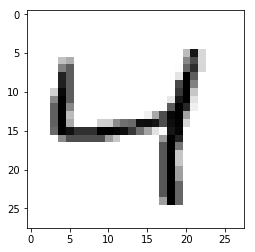

In [0]:
showImage(data.iloc[2])

We train the perceptron as we normally would.

In [0]:
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:]], data["label"], random_state=0)
classifier = Perceptron()
classifier.fit(X_train, y_train) 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

And we can calculate the accuracy on the test data

In [0]:
sum(classifier.predict(X_test) == y_test) / len(y_test)

0.86

Label: 4


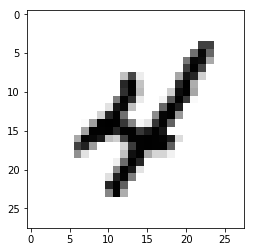

Prediction: 4


In [0]:
i=9
showImage(data.iloc[i])
print("Prediction: "+str(classifier.predict([data.iloc[i][1:]])[0]))

If you change the **i=?** in the cell above you can see how well the perceptron does on a few different examples.

- How well is the classifier doing?
- Are you surprised?